# Mask R-CNN PPE detection inference Demo

A quick intro to using the pre-trained ppe model to detect personal protective equipment. Before open this file jupyter notebook

## Installation Instruction
1.  Install Python3.6+
2.  Clone or download the Mask_RCNN repository in your file
3.  Install the Python dependencies *(Note: the versions I used here keras == 2.1.5 and Tensorflow == 1.5 )*
    ```
    §pip install -r requirements.txt 
    ```
4.  Run setup from the repository root directory
    ```
    §python setup.py install
    ``` 
5.  Download pre-trained PPE model
- Go here https://github.com/magicmercedes/maskrcnn-ppe-detection
- Download the **‘mask_rcnn_ppe.h5’** file
- Place the file in the Mask_RCNN directory
6. open up the ppe_inference and run it.
*(Note:Don't forget to set up paths)*

In [12]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "PPE_detection/"))  # To find local version
import ppe

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
PPE_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_ppe_0010.h5")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
#if not os.path.exists(COCO_MODEL_PATH):
#    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "PPE_detection/extras/predictions")

## Configurations


In [13]:
class InferenceConfig(ppe.ppeConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()

## Create Model and Load Trained Weights

In [14]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(PPE_MODEL_PATH, by_name=True)

C:\Users\yabadabadu\Maskrcnn\Mask_RCNN-master\mask_rcnn_ppe_0010.h5


## Class Names

The model classifies objects and returns class IDs, which are integer value that identify each class. Some datasets assign integer values to their classes and some don't. .


In [15]:
# PPE Class names
# Index of the class in the list is its ID. For example, to get ID of
class_names = ['BG','helmet','vest','goggles','earmuff']

## Run Object Detection

Processing 1 images
image                    shape: (2391, 3349, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 3349.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


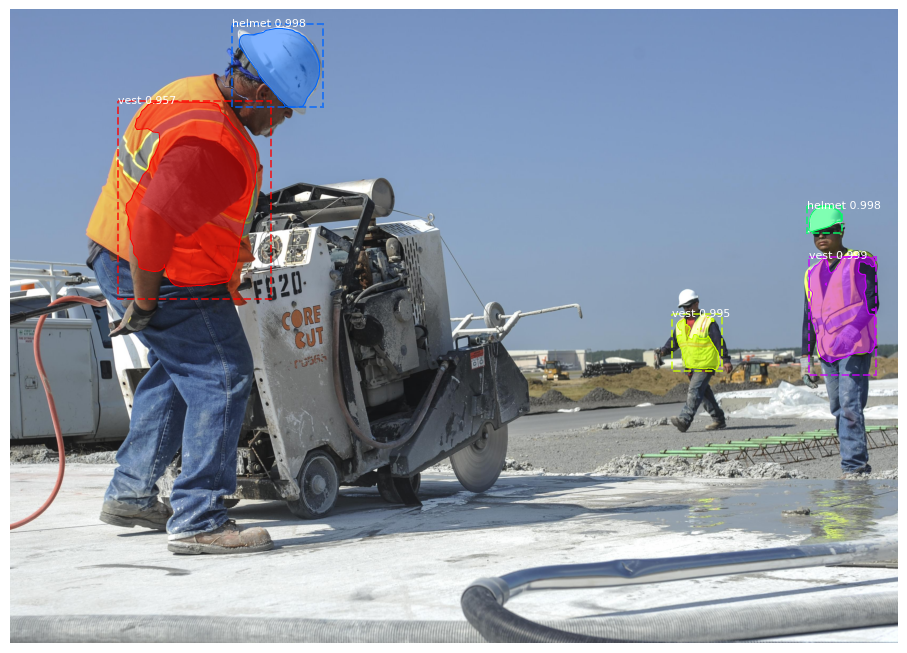

In [16]:
# Load a random image from the predictions folder
file_names = next(os.walk(IMAGE_DIR))[2]

image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detectio
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])